BANK LOAD CASE STUDY


Description

Company faces a challenge: some customers who don't have a sufficient credit history take advantage of this and default on their loans. Your task is to use Exploratory Data Analysis (EDA) to analyze patterns in the data and ensure that capable applicants are not rejected.

When a customer applies for a loan, your company faces two risks:
1. If the applicant can repay the loan but is not approved, the company loses business.
2. If the applicant cannot repay the loan and is approved, the company faces a financial loss.

The dataset you'll be working with contains information about loan applications. It includes two types of scenarios:
1. Customers with payment difficulties: These are customers who had a late payment of more than X days on at least one of the first Y installments of the loan.
2. All other cases: These are cases where the payment was made on time.

When a customer applies for a loan, there are four possible outcomes:
1. Approved: The company has approved the loan application.
2. Cancelled: The customer cancelled the application during the approval process.
3. Refused: The company rejected the loan.
4. Unused Offer: The loan was approved but the customer did not use it.

Your goal in this project is to use EDA to understand how customer attributes and loan attributes influence the likelihood of default.

Importing all the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 
import seaborn as sns

Loading the Datasets

In [4]:
adt = pd.read_csv(r"D:\Trainity Projects\Project 5\application_data.csv")


print("about the applications dataset: ",adt.shape)

about the applications dataset:  (307511, 122)


In [5]:
adt.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
n = (adt.isnull().sum()/len(adt)*100).sort_values(ascending = False).head(50) # gives the null values in the dataset
n

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
#  Seems like we have alot of null values
nc = adt.isnull().sum().sort_values(ascending=False)
nc = nc[nc.values > (0.35*len(adt))] # contains every column with more than 35% values as null


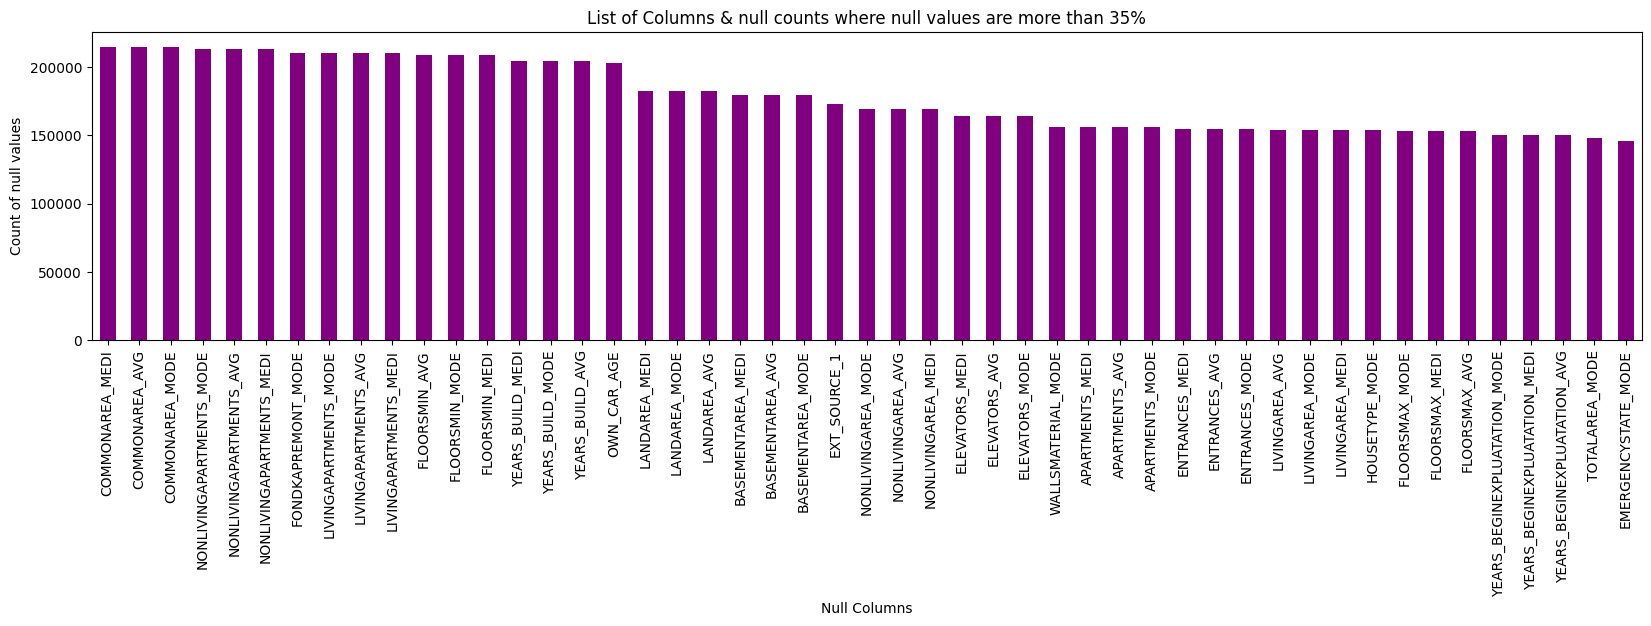

In [8]:
plt.figure(figsize=(20,4))
nc.plot(kind='bar', color="purple")                           
plt.title('List of Columns & null counts where null values are more than 35%') 
plt.xlabel("Null Columns")                  #Setting X-label and Y-label
plt.ylabel("Count of null values")
plt.show()

we will remove columns with null values of more than 35% after observing those columns.

In [9]:
len(nc)

49

We have 49 column with more than 35% null values

Lets remove these columns

In [10]:
label = list(nc.index.values) #Making list of column names having null values greater than 35%
adt.drop(labels = label,axis=1,inplace = True)

In [11]:
adt.shape

(307511, 73)

Now that we have successfully removed all the columns with null values over 35%.
We will make necessary changes to the "FLAG" columns 

In [12]:
flag=[col for col in adt.columns if "FLAG" in col]
flag

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [13]:
flag_df=adt[flag+["TARGET"]]
flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"}) #according to column description ->1 implies defaulter, 0 implies repayer

C:\Users\91852\AppData\Local\Temp\ipykernel_10520\3311917187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"}) #according to column description ->1 implies defaulter, 0 implies repayer


In [14]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Defaulter
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer


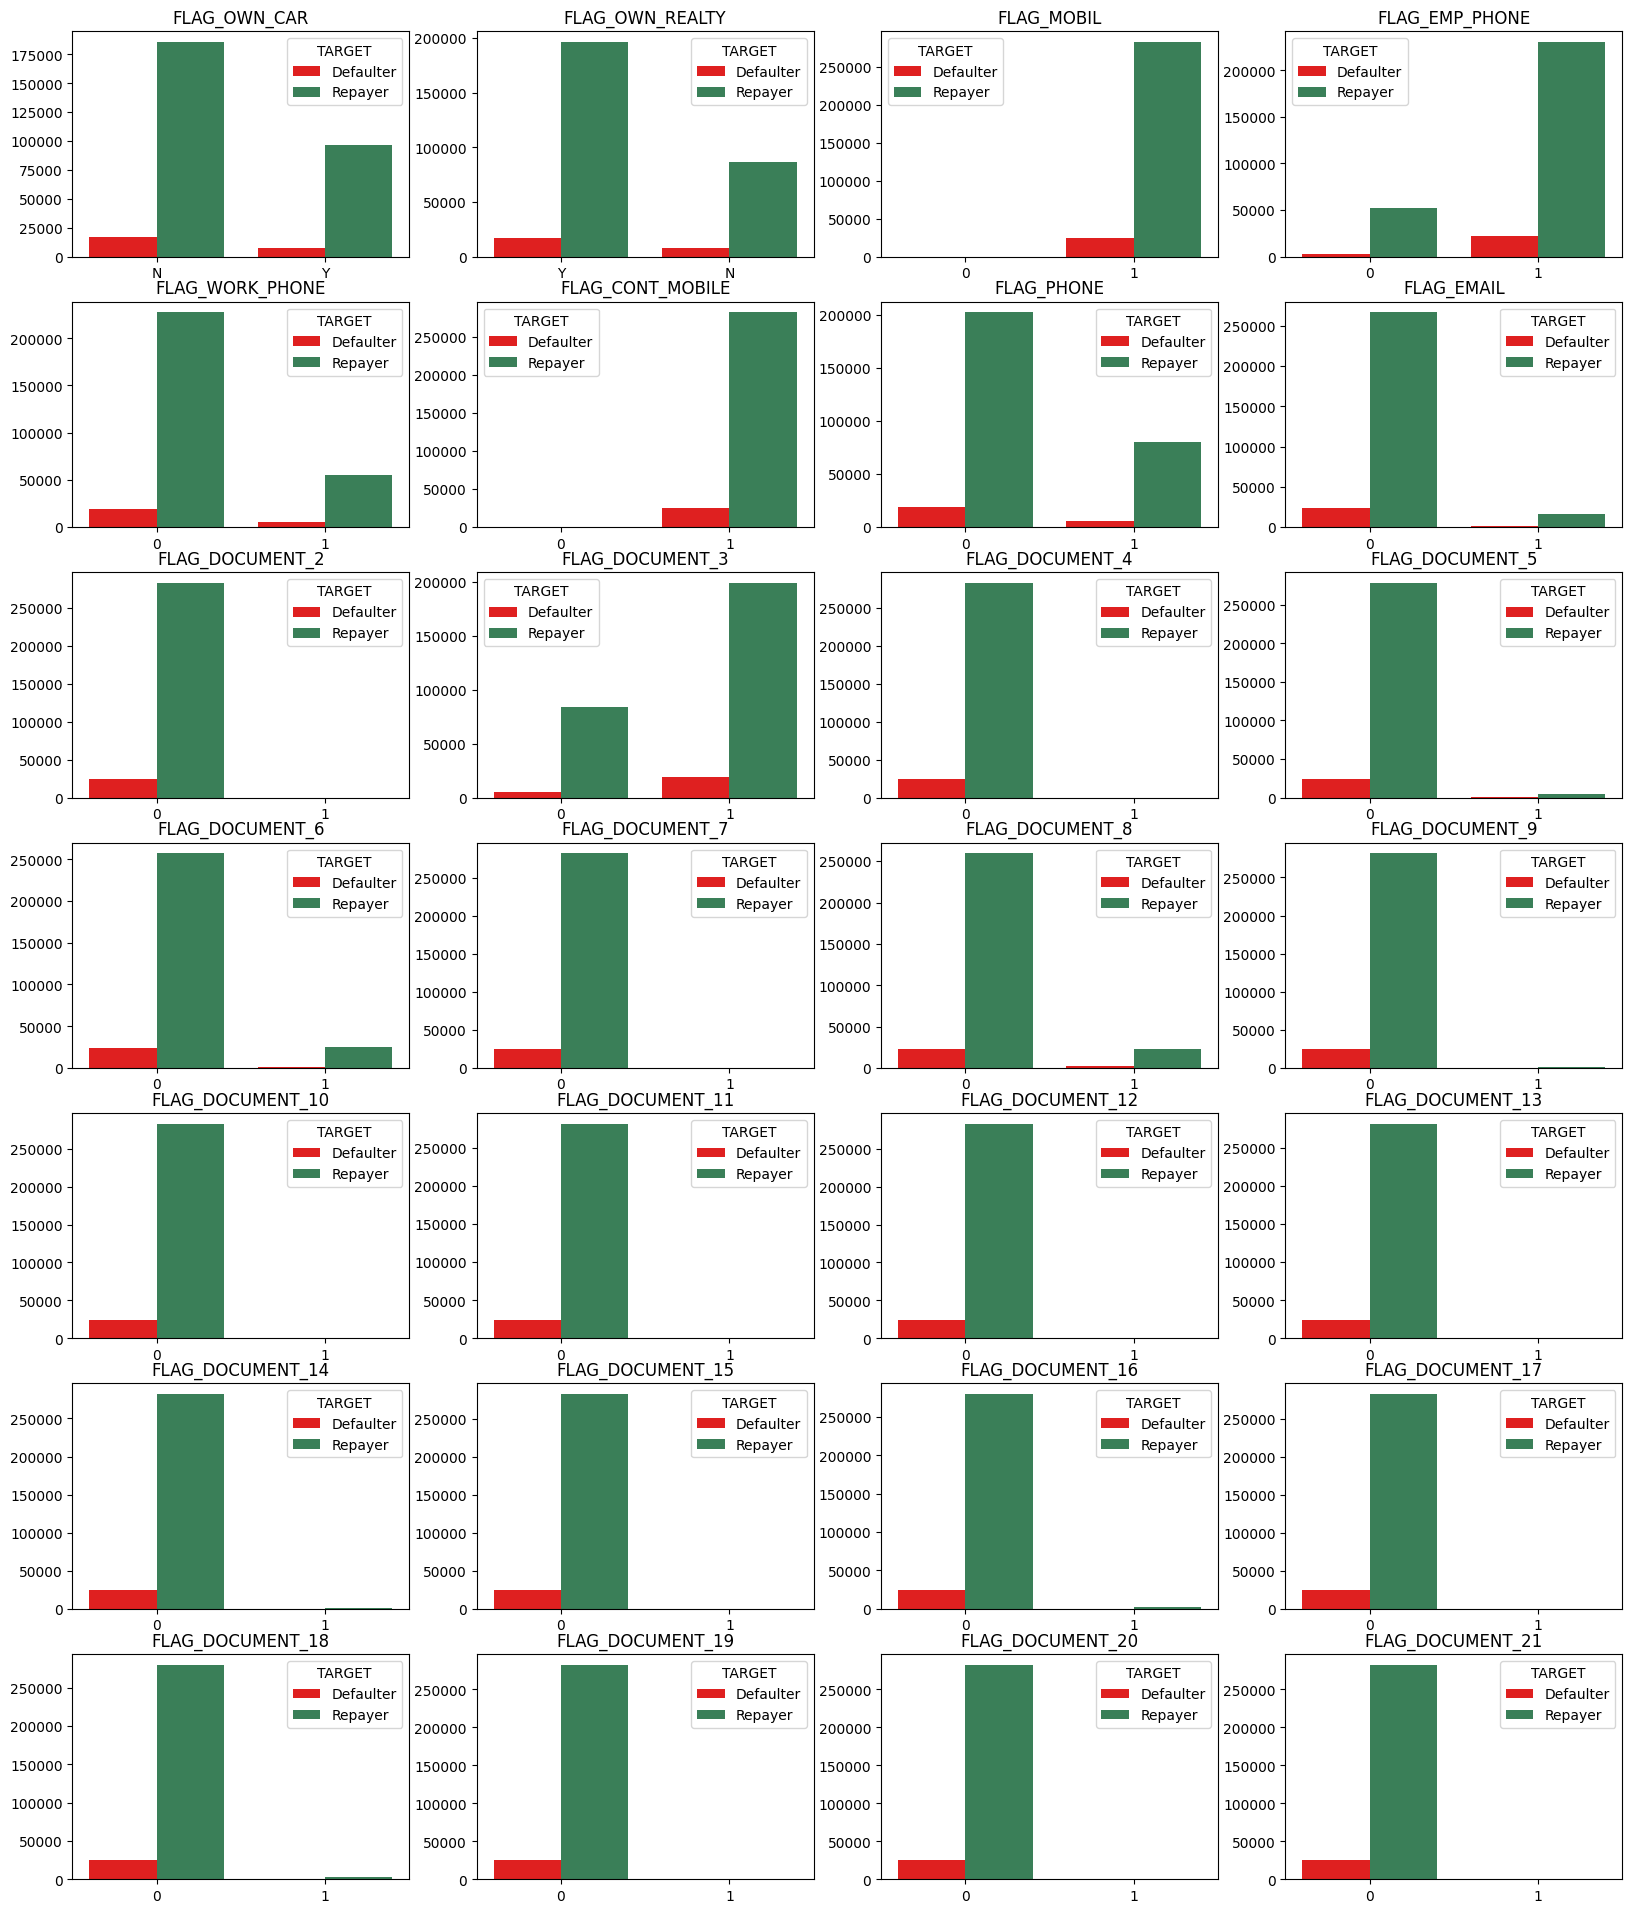

In [15]:
import itertools

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag,range(len(flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(x=flag_df[i], hue = flag_df["TARGET"], palette = ["r","seagreen"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [16]:
flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe

adt.drop(flag_df.columns, axis=1, inplace= True)
adt.shape

C:\Users\91852\AppData\Local\Temp\ipykernel_10520\3460302222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)


(307511, 48)

In [17]:
a = (adt.isnull().sum()/len(adt)*100).sort_values(ascending = False).head(50)
a.head(10)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

In [18]:
adt['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [19]:
adt['OCCUPATION_TYPE'] = adt['OCCUPATION_TYPE'].fillna("Unknown") # filling all the null values with unknown
adt['OCCUPATION_TYPE'].isnull().sum()

0

Plotting a graph based on Occupation

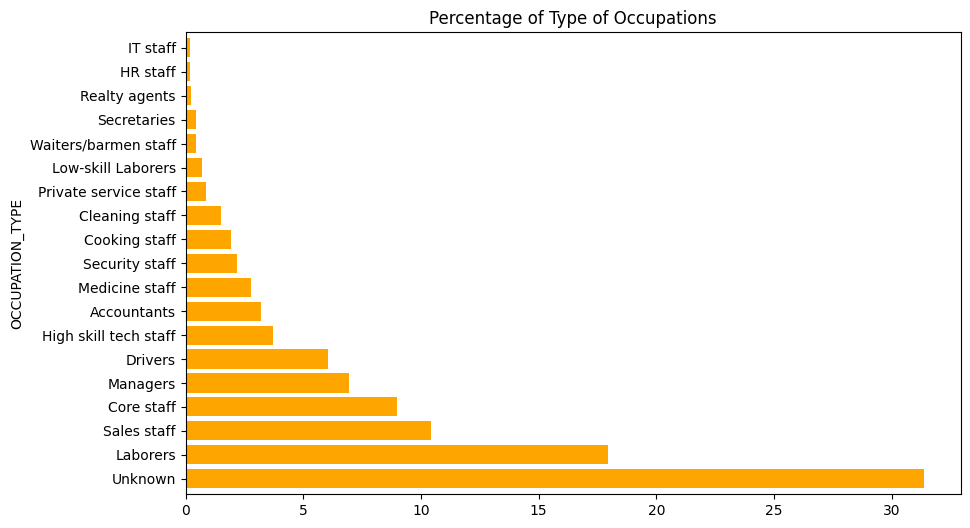

In [20]:
plt.figure(figsize = (10,6))
plt.title("Percentage of Type of Occupations")
(adt["OCCUPATION_TYPE"].value_counts(normalize=True)*100).plot.barh(color= "orange",width = .8)
plt.show()

Now we will tackle the missing values in the numerical columns

In [21]:
(adt.isnull().sum()).sort_values(ascending = False)

EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
HOUR_APPR_PROCESS_START            0
FLAG_DOCUMENT_3                    0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
SK_ID_CURR                         0
W

In [22]:
amt = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]
adt[amt].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [23]:
m = adt[amt].median()
adt.fillna(m, inplace=True)
(adt.isnull().sum()).sort_values(ascending = False)

EXT_SOURCE_3                   60965
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_LIVE_CITY             0
ORGANIZATION_TYPE                  0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
SK_ID_CURR                         0
HOUR_APPR_PROCESS_START            0
FLAG_DOCUMENT_3                    0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
AMT_REQ_CREDIT_BUREAU_MON          0
AMT_REQ_CREDIT_BUREAU_QRT          0
REG_REGION_NOT_LIVE_REGION         0
REGION_RATING_CLIENT_W_CITY        0
W

In [24]:
adt['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [25]:
adt['NAME_TYPE_SUITE'] = adt['NAME_TYPE_SUITE'].fillna("Unaccompanied")
adt['NAME_TYPE_SUITE'].isnull().sum()

0

In [26]:
del adt['EXT_SOURCE_3']
del adt['EXT_SOURCE_2']

In [27]:
(adt.isnull().sum()).sort_values(ascending = False)

OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
ORGANIZATION_TYPE                 0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
SK_ID_CURR                        0
WEEKDAY_APPR_PROCESS_START        0
FLAG_DOCUMENT_3                   0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_QRT         0
HOUR_APPR_PROCESS_START           0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
NAME_EDUCATION_TYPE               0
NAME_CONTRACT_TYPE          

In [28]:
d=["DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE"]
adt[d].describe()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.100049,1.405292,0.143421,1.422245
std,0.362291,2.379803,0.446698,2.400989
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000
max,24.000000,344.000000,34.000000,348.000000


In [29]:
adt.fillna(adt[d].median(), inplace=True)

In [30]:
(adt.isnull().sum()).sort_values(ascending = False).head(10)

AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
SK_ID_CURR                       0
OBS_30_CNT_SOCIAL_CIRCLE         0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
LIVE_REGION_NOT_WORK_REGION      0
REG_CITY_NOT_LIVE_CITY           0
dtype: int64

In [31]:
print(adt['DAYS_LAST_PHONE_CHANGE'].head(10))
adt['CNT_FAM_MEMBERS'].describe()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
5   -2536.0
6   -1562.0
7   -1070.0
8       0.0
9   -1673.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [32]:
adt['CNT_FAM_MEMBERS'].fillna(2,inplace=True)
adt['DAYS_LAST_PHONE_CHANGE'].dropna(inplace=True) # since it had only one null value
adt['DAYS_LAST_PHONE_CHANGE'] = adt['DAYS_LAST_PHONE_CHANGE'].abs() # to convert the values from negative to positive

In [33]:
adt['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [34]:
am = ["AMT_GOODS_PRICE","AMT_ANNUITY"]
adt[am].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY
count,3.072330e+05,307499.000000
mean,5.383962e+05,27108.573909
std,3.694465e+05,14493.737315
min,4.050000e+04,1615.500000
25%,2.385000e+05,16524.000000
50%,4.500000e+05,24903.000000
75%,6.795000e+05,34596.000000
max,4.050000e+06,258025.500000


In [35]:
adt.fillna(adt[am].median, inplace=True)
(adt.isnull().sum()).sort_values(ascending = False).head(10)

SK_ID_CURR                     0
OBS_30_CNT_SOCIAL_CIRCLE       0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
dtype: int64

In [36]:
#  There are some column which are still left with negative values
l = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
adt[l] = adt[l].abs()

SHOWCASING OUTLIERS

C:\Users\91852\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\91852\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\91852\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\91852\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

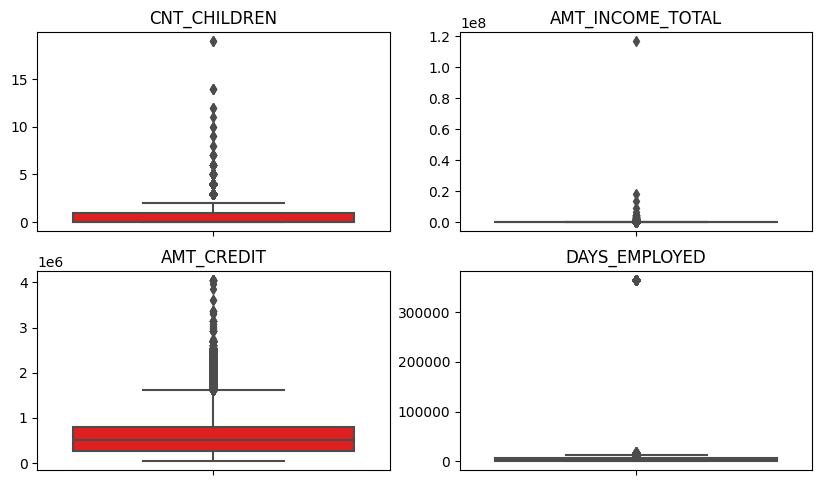

In [70]:
outlier = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "DAYS_EMPLOYED"]
plt.figure(figsize=(10,15))
for i,j in itertools.zip_longest(outlier, range(len(outlier))):
    plt.subplot(5,2,j+1)
    sns.boxplot(y = adt[i], orient = "h", color = "red")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)


In [38]:
adt['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

We have no more null values anymore and the Dataset has been cleaned

SAVING THE CLEANED DATASET ON SYSTEM 

In [39]:
adt.to_csv("cleaned_application_data.csv")

Now we will clean the previous_applications dataset

In [40]:
prev = pd.read_csv(r'D:\Trainity Projects\Project 5\previous_application.csv')
prev.shape

(1670214, 37)

In [41]:
(prev.isnull().sum()/len(prev)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [42]:
l = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','NAME_TYPE_SUITE','NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DRAWING']
prev_clean = prev.drop(columns=l)
prev_clean.shape

(1670214, 26)

In [43]:
Unnecessary_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
prev_clean = prev_clean.drop(columns=Unnecessary_col)
prev_clean.shape

(1670214, 22)

DEALING WITH MISSING/NULL VALUES

In [44]:
prev_clean.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,-684,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-14,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-21,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-386,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-57,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [45]:
prev_clean['DAYS_DECISION'] = prev['DAYS_DECISION'].abs()

In [46]:
prev_clean['DAYS_DECISION'].head()

0     73
1    164
2    301
3    512
4    781
Name: DAYS_DECISION, dtype: int64

In [47]:
(prev_clean.isnull().sum()/len(prev_clean)*100).sort_values(ascending=False)

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [48]:
prev_clean['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [49]:
prev_clean['AMT_CREDIT'].mode()


0    0.0
Name: AMT_CREDIT, dtype: float64

In [50]:
prev_clean['AMT_CREDIT'].fillna(0.0,inplace=True)


In [51]:
prev_clean['PRODUCT_COMBINATION'].head()
prev_clean['PRODUCT_COMBINATION'].describe()


count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [52]:
prev_clean['PRODUCT_COMBINATION'].fillna('Cash',inplace=True)


In [53]:
prev_clean['CNT_PAYMENT'].head(10)

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
5    18.0
6     NaN
7     NaN
8     NaN
9     NaN
Name: CNT_PAYMENT, dtype: float64

In [54]:
prev_clean['CNT_PAYMENT'].fillna(prev_clean['CNT_PAYMENT'].median(),inplace=True)

In [55]:
# prev_clean['AMT_ANNUITY'].describe()
print(prev_clean['AMT_ANNUITY'].mode())
print(prev_clean['AMT_ANNUITY'].mean())
print(prev_clean['AMT_ANNUITY'].median())



0    2250.0
Name: AMT_ANNUITY, dtype: float64
15955.120659452119
11250.0


In [56]:
prev_clean['AMT_ANNUITY'].fillna(prev_clean['AMT_ANNUITY'].median(),inplace=True)


In [57]:
# prev_clean['AMT_GOODS_PRICE'].describe()
print(prev_clean['AMT_GOODS_PRICE'].mode())
print(prev_clean['AMT_GOODS_PRICE'].mean())
print(prev_clean['AMT_GOODS_PRICE'].median())

0    45000.0
Name: AMT_GOODS_PRICE, dtype: float64
227847.27928334562
112320.0


In [58]:
prev_clean['AMT_GOODS_PRICE'].fillna(prev_clean['AMT_GOODS_PRICE'].median(),inplace=True)


In [59]:
(prev_clean.isnull().sum()/len(prev_clean)*100).sort_values(ascending=False)


SK_ID_PREV                0.0
SK_ID_CURR                0.0
NAME_YIELD_GROUP          0.0
CNT_PAYMENT               0.0
NAME_SELLER_INDUSTRY      0.0
SELLERPLACE_AREA          0.0
CHANNEL_TYPE              0.0
NAME_PRODUCT_TYPE         0.0
NAME_PORTFOLIO            0.0
NAME_GOODS_CATEGORY       0.0
NAME_CLIENT_TYPE          0.0
CODE_REJECT_REASON        0.0
NAME_PAYMENT_TYPE         0.0
DAYS_DECISION             0.0
NAME_CONTRACT_STATUS      0.0
NAME_CASH_LOAN_PURPOSE    0.0
AMT_GOODS_PRICE           0.0
AMT_CREDIT                0.0
AMT_APPLICATION           0.0
AMT_ANNUITY               0.0
NAME_CONTRACT_TYPE        0.0
PRODUCT_COMBINATION       0.0
dtype: float64

SAVING ON LOCAL SYSTEM

In [60]:
prev_clean.to_csv('clean_prev_application.csv')

MERGING THE DATSETS

In [62]:
app_clean = pd.read_csv(r'cleaned_application_data.csv')


C:\Users\91852\AppData\Local\Temp\ipykernel_10520\3820721257.py:1: DtypeWarning: Columns (9,39) have mixed types. Specify dtype option on import or set low_memory=False.
  app_clean = pd.read_csv(r'cleaned_application_data.csv')


In [64]:
merged_data = pd.merge(app_clean,prev_clean,how='inner',on='SK_ID_CURR')
merged_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [65]:
merged_data.to_csv('merged_data.csv')


CORRELATION CHART

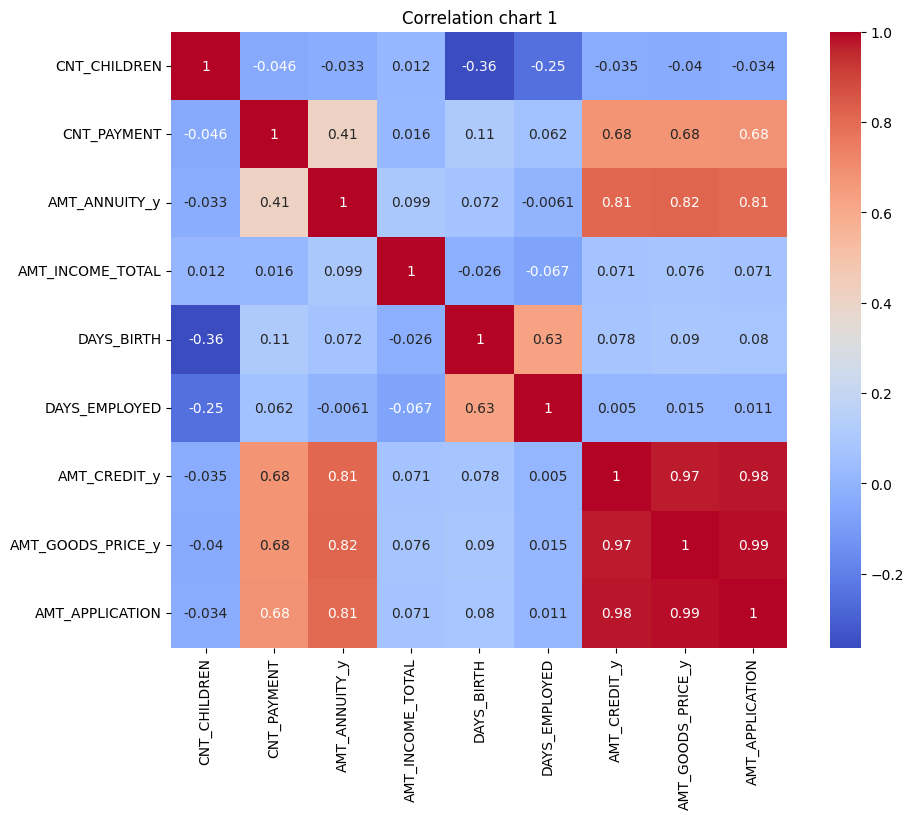

In [66]:
col = ['CNT_CHILDREN','CNT_PAYMENT','AMT_ANNUITY_y','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','AMT_CREDIT_y','AMT_GOODS_PRICE_y','AMT_APPLICATION']

correlation = merged_data[col].corr()
plt.figure(figsize=(11,8))
plt.title("Correlation chart 1")
sns.heatmap(correlation,annot=True,cmap='coolwarm',square=True)
plt.show()

RATIO ON IMBALANCE

In [67]:
count = merged_data['TARGET'].value_counts()
ratio = count[1]/count[0]
print("Imbalance ratio:%.5f"%(ratio))

Imbalance ratio:0.09475


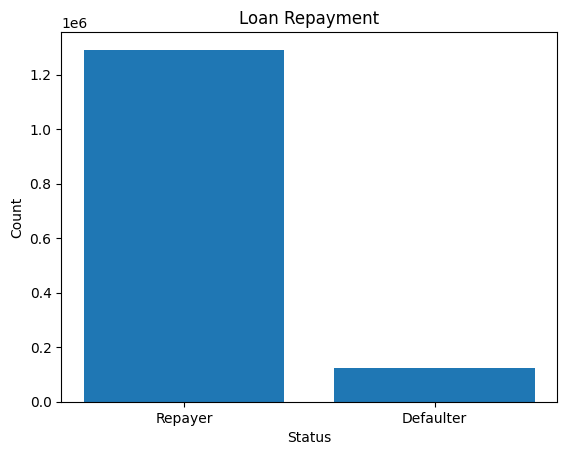

In [68]:
lt = [count[0],count[1]]
x = ['Repayer','Defaulter']
plt.title('Loan Repayment')
plt.xlabel('Status')
plt.ylabel('Count')
plt.bar(x,lt)
plt.show()